In [77]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator


### Creating grey scaled floorplan

In [15]:
import cv2

# Load the color floor plan image
image = cv2.imread('floorplan_images/L_6.jpg')  

# Convert the color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image to a file
cv2.imwrite('L6_grayscale_image.jpg', gray_image) 




True

In [7]:
images_path = {'3': "floorplan_images/L_3.png",
               '4':"floorplan_images/L_4.png",
               '5': 'floorplan_images/L_5.png',
               '6':"floorplan_images/L_6.jpg",
               '6Chinese':"floorplan_images/L_6Chinese.jpg"}

greyscale_images = {'3': "floorplan_images/L3_grayscale_image.jpg",
               '4':"floorplan_images/L4_grayscale_image.jpg",
               '5': 'floorplan_images/L5_grayscale_image.jpg',
               '6':"floorplan_images/L6_grayscale_image.jpg",
               '6Chinese':"floorplan_images/L6Chinese_grayscale_image.jpg"}

regions_coordinates = {'3':{'Discussion.Cubicles':[[4103,5450,522,748]],'Soft.seats':[[1738,811,187,330],[1969,3542,621,1215],[4356,5467,192,330],[4488,5456,2860,3014]],
                            'Moveable.seats':[[4367,5362,1050,2090]]},
                       '4':{'Soft.seats':[[1166,1639,682,1155],[2178,2656,1309,1721],[3228,3822,792,902],[4625,5098,1639,2530],[4537,5175,2799,2909]],
                             'Sofa':[[1039,1749,1375,1584], [2909, 3987,1364,1606]]},
                       '5':{'Windowed.Seats':[[36 ,1220,40,132],[40, 128,136,1308],[144,1224,1212,1304],[1644,4532,780,900],[1912,2668,2396,2528],[44,1912,2840,2960],[4720,5548,784,904],[5548,5688,784,2948],[4720,5548,2836,2948]],
                             'X4.man.tables':[[288,1068,196,316],[1304,1568,368,736],[212,1004,2140,2260],[2156,2425,2134,2255],[1432,1704,2144,2264],[4108,4372,1045,1985]],
                             'X8.man.tables':[[1992,3904,1024,1188],[1300,1828,2528,2700]]},
                        '6':{'Diagonal.Seats':[[624,2007,348,492]],
                             'Cubicle.seats':[[144,519,300,507], [1614,1986,675,1356]],
                             'Windowed.Seats':[[150,2292,63,159],[2250,2355,267,1404] ,[1803,2283,1491,1587]]},
                        '6Chinese':{'Diagonal.Seats':[[610,2342,918,1084]],
                                    'Cubicle.seats':[[710,2644,1252,1340]],
                                    'Windowed.Seats':[[208,300,756,1314],[630,2860,2022,2100],[2982,3074,1022,1992]]}}


students = {'Windowed.Seats':30, 'X4.man.tables':20,'X8.man.tables':80}



## Heatmap approach

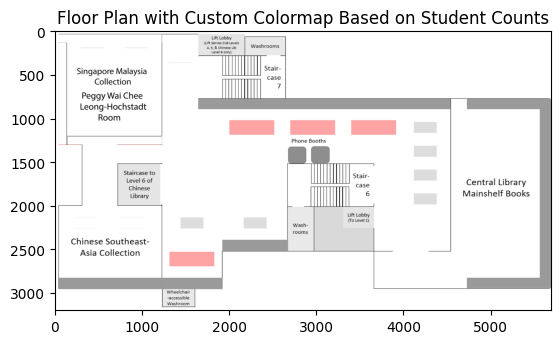

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Sample data (replace this with your actual data)
images_path = {'5': '/Users/yg/Downloads/dsa3101-2310-04-library/L5_grayscale_image.jpg'}
regions_coordinates = {
    '5': {
        'Windowed.Seats': [[36, 1220, 40, 132], [40, 128, 136, 1308], [144, 1224, 1212, 1304]],
        'X4.man.tables': [[288, 1068, 196, 316], [1304, 1568, 368, 736], [212, 1004, 2140, 2260]],
        'X8.man.tables': [[1992, 3904, 1024, 1188], [1300, 1828, 2528, 2700]]
    }
}
students = {'Windowed.Seats': 60, 'X4.man.tables': 20, 'X8.man.tables': 80}

# Load your floor plan image
image = cv2.imread(images_path['5'])

# Define a colormap transitioning from blue to red
cmap = LinearSegmentedColormap.from_list(
    'custom_colormap',
    [(0, 'blue'), (0.5, 'white'), (1, 'red')],  # Customize colors as needed
    N=256
)

# Create an array to store the colormap values
colormap_values = []

# Create a colormap based on the number of students
for seat_type, coordinates_list in regions_coordinates['5'].items():
    student_count = students.get(seat_type, 0)
    normalized_student_count = student_count / max(students.values())  # Normalize to [0, 1]
    color = cmap(normalized_student_count)  # Get color from the colormap
    colormap_values.append(color)

heatmap = np.zeros_like(image, dtype=np.uint8)

for idx, (seat_type, coordinates_list) in enumerate(regions_coordinates['5'].items()):
    for x1, x2, y1, y2 in coordinates_list:
        heatmap[y1:y2 + 1, x1:x2 + 1] = (np.array(colormap_values[idx][:3]) * 255).astype(np.uint8)

# Overlay the heatmap on the floor plan
overlay = cv2.addWeighted(image, 1.0, heatmap, 0.8, 0)

plt.imshow(overlay)
plt.title('Floor Plan with Custom Colormap Based on Student Counts')
plt.show()


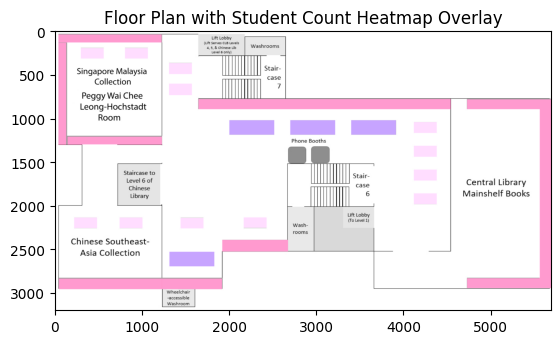

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_heatmap(region_coordinates, image_path, student_occupancy):
    # Load your floor plan image
    image = cv2.imread(image_path)

    def map_students_to_color(student_count):
        # Use a continuous colormap from blue to red
        # The colormap range is [0, 1]
        normalized_count = student_count / 100  # Adjust as needed
        # Create a colormap ranging from blue (0, 0, 255) to red (255, 0, 0)
        color = (1 - normalized_count, 0, normalized_count)
        return (np.array(color) * 255).astype(int)

    heatmap = np.zeros_like(image, dtype=np.uint8)

    for seat_type, coordinates_list in region_coordinates.items():
        student_count = student_occupancy.get(seat_type, 0)
        color = map_students_to_color(student_count)
        for x1, x2, y1, y2 in coordinates_list:
            heatmap[y1:y2 + 1, x1:x2 + 1] = color

    # Overlay the heatmap on the floor plan
    overlay = cv2.addWeighted(image, 1.0, heatmap, 0.7, 0)

    plt.imshow(overlay)
    plt.title('Floor Plan with Student Count Heatmap Overlay')
    plt.show()

# Example usage:
region_coordinates = {'Windowed.Seats':[[36 ,1220,40,132],[40, 128,136,1308],[144,1224,1212,1304],[1644,4532,780,900],[1912,2668,2396,2528],[44,1912,2840,2960],[4720,5548,784,904],[5548,5688,784,2948],[4720,5548,2836,2948]],
                             'X4.man.tables':[[288,1068,196,316],[1304,1568,368,736],[212,1004,2140,2260],[2156,2425,2134,2255],[1432,1704,2144,2264],[4108,4372,1045,1985]],
                             'X8.man.tables':[[1992,3904,1024,1188],[1300,1828,2528,2700]]}
student_occupancy = {'Windowed.Seats':30, 'X4.man.tables':20,'X8.man.tables':80}

image_path = '/Users/yg/Downloads/dsa3101-2310-04-library/L5_grayscale_image.jpg'

generate_heatmap(region_coordinates, image_path, student_occupancy)


In [ ]:
## Contour Approach

(3200, 5692, 3)


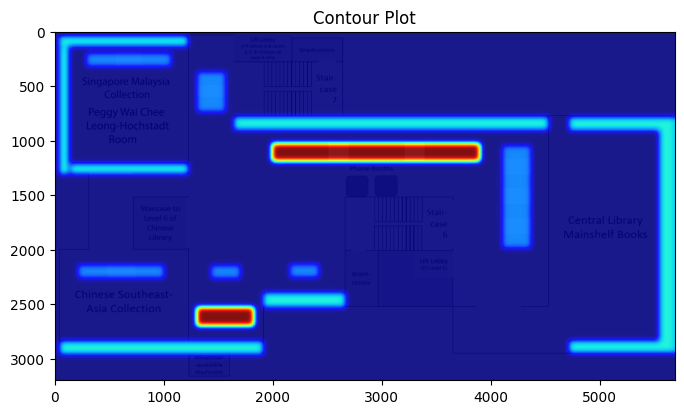

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

region = {'Windowed.Seats':[[36 ,1220,40,132],[40, 128,136,1308],[144,1224,1212,1304],[1644,4532,780,900],[1912,2668,2396,2528],[44,1912,2840,2960],[4720,5548,784,904],[5548,5688,784,2948],[4720,5548,2836,2948]],
                             'X4.man.tables':[[288,1068,196,316],[1304,1568,368,736],[212,1004,2140,2260],[2156,2425,2134,2255],[1432,1704,2144,2264],[4108,4372,1045,1985]],
                             'X8.man.tables':[[1992,3904,1024,1188],[1300,1828,2528,2700]]}
students = {'Windowed.Seats':30, 'X4.man.tables':20,'X8.man.tables':80}
image_path = 'floorplan_images/L5_grayscale_image.jpg'
image = cv2.imread(image_path)
print(image.shape)
def generate_floorplan_contour(image, region, students):
    x_range = np.arange(image.shape[1])
    y_range = np.arange(image.shape[0])
    xx, yy = np.meshgrid(x_range, y_range)
    
    # Create an array for contour data
    contour_data = np.zeros_like(xx, dtype=np.float32)
    
    for seat_type, coordinates_list in region.items():
        for x1, x2, y1, y2 in coordinates_list:
            student_count = students.get(seat_type, 0)
            # Update the corresponding region in the contour data
            contour_data[y1:y2 + 1, x1:x2 + 1] = student_count


    # Apply Gaussian blur to the contour data
    contour_data = cv2.GaussianBlur(contour_data, ksize=(251, 251), sigmaX=25, sigmaY=25)

    # Apply the mask to make regions with 0 students transparent
    #contour_data *= mask

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)

    # Create the contour plot
    contours = ax.pcolormesh(xx, yy, contour_data, cmap="jet", alpha=0.9)

    ax.set_title('Contour Plot')
    plt.show()

generate_floorplan_contour(image, region, students)


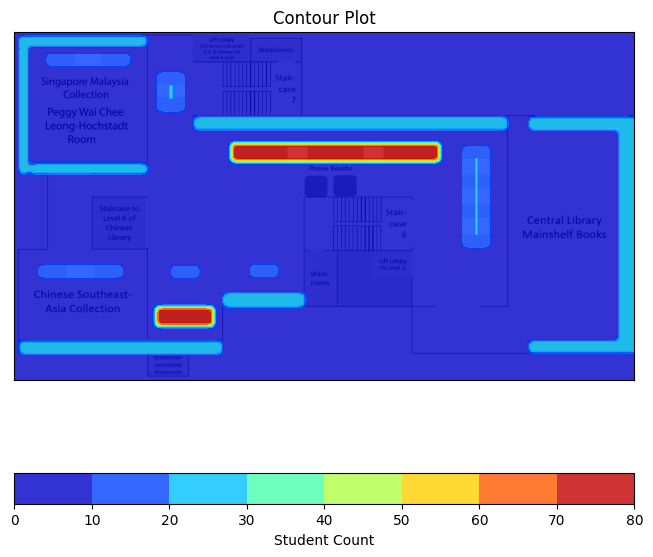

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

region = {'Windowed.Seats':[[36 ,1220,40,132],[40, 128,136,1308],[144,1224,1212,1304],[1644,4532,780,900],[1912,2668,2396,2528],[44,1912,2840,2960],[4720,5548,784,904],[5548,5688,784,2948],[4720,5548,2836,2948]],
                             'X4.man.tables':[[288,1068,196,316],[1304,1568,368,736],[212,1004,2140,2260],[2156,2425,2134,2255],[1432,1704,2144,2264],[4108,4372,1045,1985]],
                             'X8.man.tables':[[1992,3904,1024,1188],[1300,1828,2528,2700]]}
students = {'Windowed.Seats':30, 'X4.man.tables':20,'X8.man.tables':80}
image_path = 'floorplan_images/L5_grayscale_image.jpg'
image = cv2.imread(image_path)

def generate_floorplan_contour(image, region, students):
    x_range = np.arange(image.shape[1])
    y_range = np.arange(image.shape[0])
    xx, yy = np.meshgrid(x_range, y_range)
    
    # Create an array for contour data
    contour_data = np.zeros_like(xx, dtype=np.float32)
    
    for seat_type, coordinates_list in region.items():
        for x1, x2, y1, y2 in coordinates_list:
            student_count = students.get(seat_type, 0)
            # Update the corresponding region in the contour data
            contour_data[y1:y2 + 1, x1:x2 + 1] = student_count

    # Apply Gaussian blur to the contour data
    contour_data = cv2.GaussianBlur(contour_data, ksize=(251, 251), sigmaX=25, sigmaY=25)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)

    # Create the 'jet' colormap with transparent color for 0 student counts
    cmap = plt.get_cmap('jet')
    cmap.set_under('none')  # Set 0 student counts to transparent

    # Create the contour plot
    contours = ax.contourf(xx, yy, contour_data, cmap=cmap, alpha=0.8)

    # Create a color bar
    cbar = plt.colorbar(contours, ax=ax, orientation='horizontal')
    cbar.set_label('Student Count')

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_title('Contour Plot')
    plt.show()

generate_floorplan_contour(image, region, students)

